# Interactive Plot

상호작용 할 수 있는 데이터 시각화 도구 

- plotly
- pyeplot



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'

import pyecharts as pe
from pyecharts import options as opts

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('../input/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


train 데이터의 분포 확인

In [0]:
train.shape

(595212, 59)

## 데이터 셋 확인
결측치 존재 여부 확인


In [0]:
train.isnull().any().any()

False

In [0]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

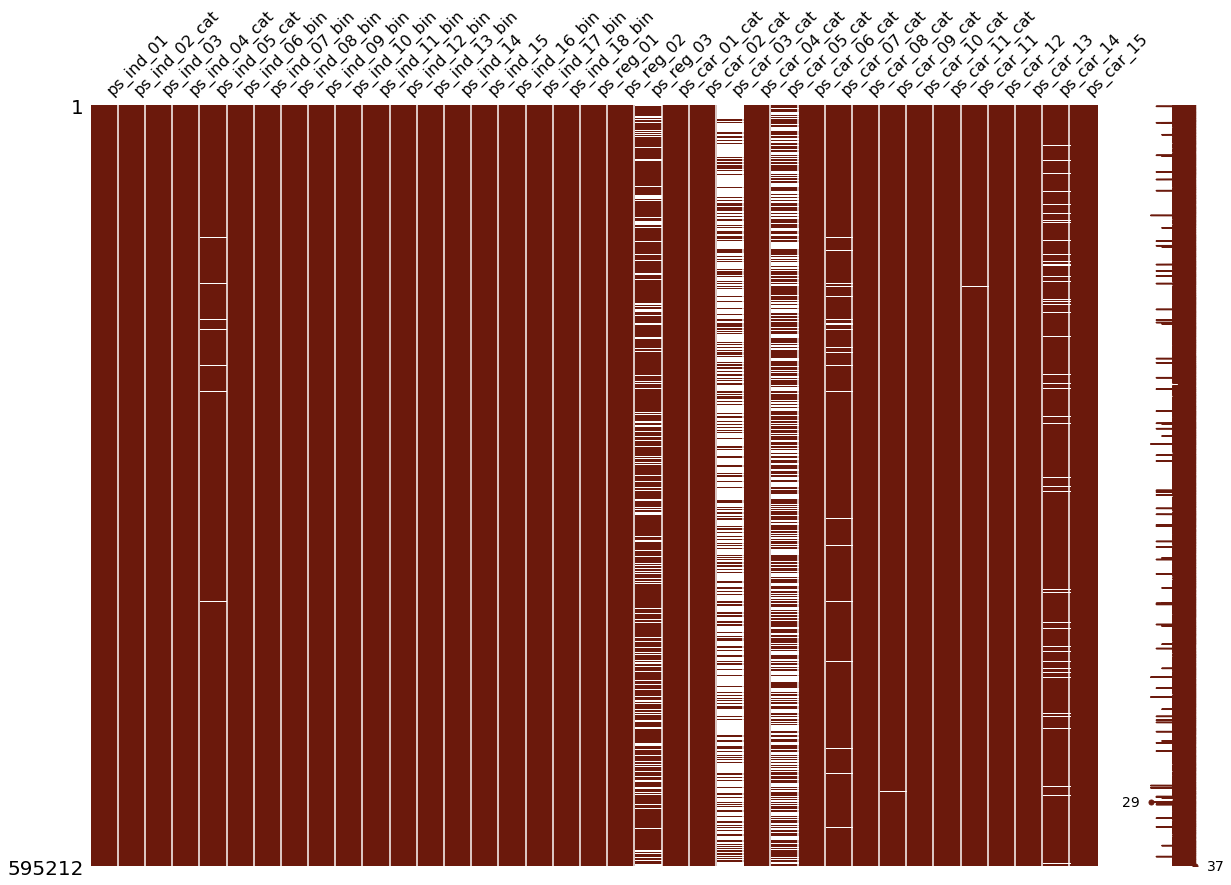

In [0]:
import missingno as msno

msno.matrix(df = train_copy.iloc[:,2:39],
            figsize = (20, 14), color = (0.42, 0.1, 0.05))

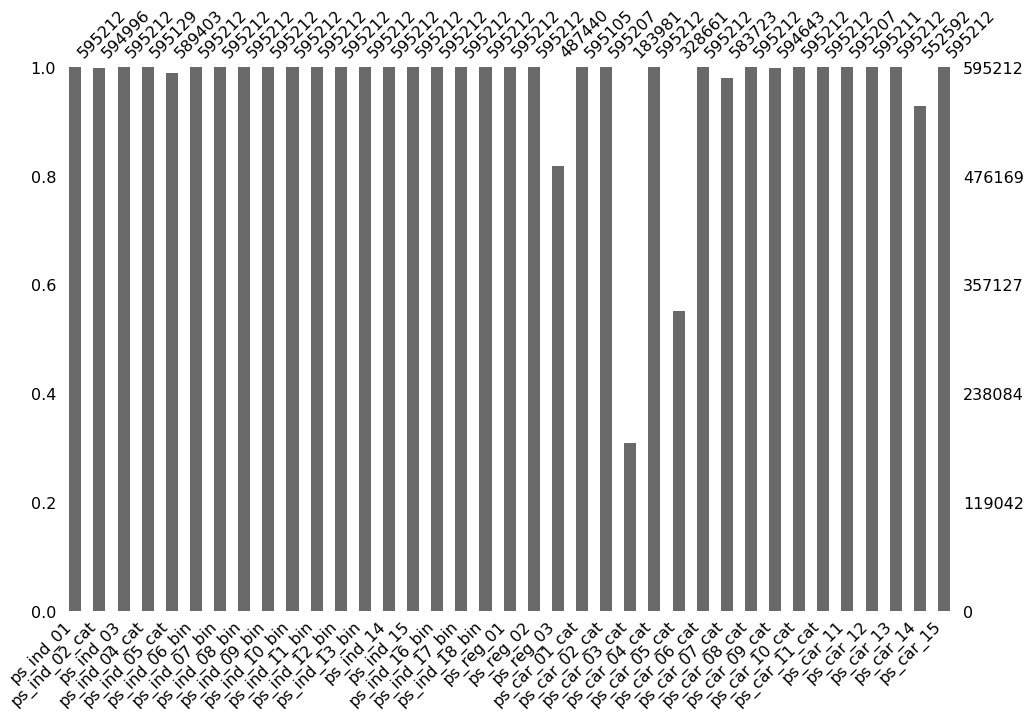

In [0]:
msno.bar(df = train_copy.iloc[:, 2:39], figsize = (16, 10))

## 반응변수 시각화



In [0]:
data = [
    go.Bar(
        x = train_copy['target'].unique(),
        y = train_copy['target'].value_counts().values,
        text = 'Distribution of target variable'
    )]

layout = go.Layout(
    title = 'Target variable distribution'
)

fig = go.Figure(data = data, layout = layout)
fig.show()

In [0]:
from IPython.display import HTML

attr = ['target 0', 'target 1']

bar = pe.charts.Bar(init_opts = opts.InitOpts(width = '600px', height = '600px'))
bar.set_global_opts(title_opts = opts.TitleOpts(title = 'Target variable distribution',
                                                subtitle = 'Number of Target values'),
                    legend_opts = opts.LegendOpts(pos_top = 50))
bar.add_xaxis(attr)
bar.add_yaxis('target values', [573518, 21694], itemstyle_opts = {'color' : '#ff0000'})

output = bar.render()
HTML(output)

## Datatype 확인

In [0]:
from collections import Counter
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [0]:
train_float = train.select_dtypes(include = 'float64')
float_var = train_float.columns

train_int = train.select_dtypes(include = 'int64')
int_var = [var for var in train_int.columns if not(var == 'id')]

## 상관관계 시각화


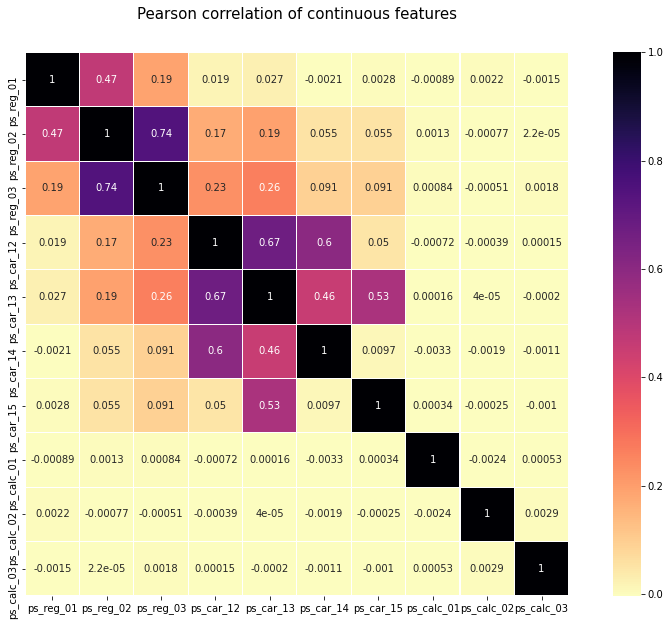

In [0]:
color_map = plt.cm.magma_r
plt.figure(figsize = (16, 10))
plt.title('Pearson correlation of continuous features',
          y = 1.05, size = 15)
sns.heatmap(train_copy[float_var].corr(), 
            linewidths = 0.1,
            vmax = 1.0, 
            square = True,
            cmap = color_map,
            linecolor = 'white',
            annot = True)

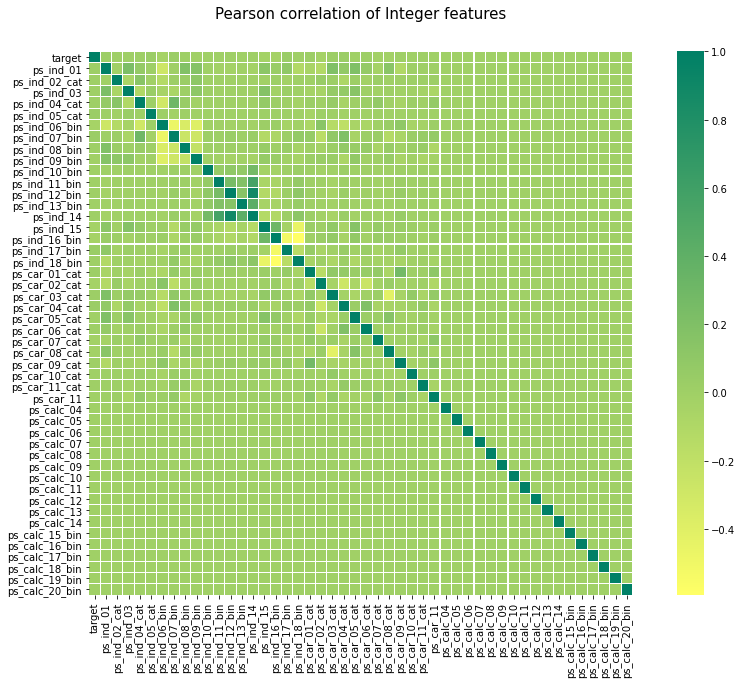

In [0]:
color_map = plt.cm.summer_r
plt.figure(figsize = (16, 10))
plt.title('Pearson correlation of Integer features',
          y = 1.05, size = 15)
sns.heatmap(data = train_copy[int_var].corr(),
            linewidths = 0.1,
            vmax = 1.0, 
            square = True,
            cmap = color_map,
            linecolor = 'white',
            annot = False)

In [0]:
data = [
    go.Heatmap(
        z = train_copy[int_var].corr().values,
        x = train_copy[int_var].columns.values,
        y = train_copy[int_var].columns.values,
        colorscale = 'Viridis',
        reversescale = False,
        opacity = 1.0 )
]

layout = go.Layout(
    title = 'Pearson Correlation of Integer-type features',
    xaxis = dict(ticks = '', nticks = 36),
    yaxis = dict(ticks = '' ),
    width = 900, height = 700)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## Mutual Information
정보 이론 중 하나로  
두 변수가 얼마나 연관 돼 있는지를 확인 한다.  
만약, 변수 간 상관이 없고 상호 독립일 경우만  
0의 값을 갖고 독립이 아닐 경우 0 이상의 값을 갖는다.  

즉, 값이 0이라는 것은 서로 정보를 얻을 게 없다는 의미며 값이 커질 수록 하나의 값이 존재할 때   
다른 하나가 추가 됐을 경우 얻을 수 있는 정보의 양이 많다는 의미이다.




In [0]:
from sklearn.feature_selection import mutual_info_classif
mf_float = mutual_info_classif(train[float_var].values,
                               train.target.values,
                               n_neighbors = 3,
                               random_state = 2020)
print(mf_float)

[0.01392491 0.0043648  0.00535136 0.00778353 0.00141324 0.00230197
 0.01233319 0.00531775 0.00546358 0.00527269]


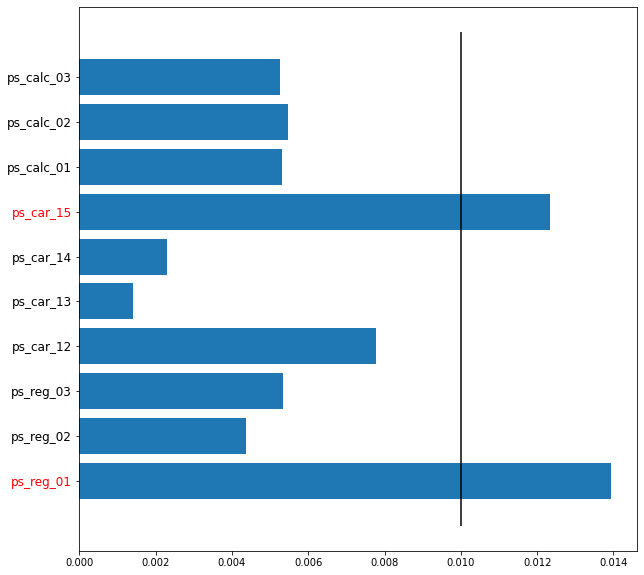

In [0]:
f, ax = plt.subplots(figsize = (10, 10))
pos = np.arange(len(mf_float))
plt.barh(pos, mf_float)
plt.yticks(pos, float_var)
threshold = 0.01

for i, tick in enumerate(ax.yaxis.get_major_ticks()) :
    tick.label.set_fontsize(12)
    if np.squeeze(mf_float)[i] > threshold :
        tick.label.set_color("red")
        
plt.vlines(x = threshold , ymin = -1 , ymax = len(mf_float))

In [0]:
mf_int = mutual_info_classif(train[int_var].values,
                             train.target.values,
                             n_neighbors = 3,
                             random_state = 2020)
print(mf_int)

[1.56664730e-01 1.40080741e-02 6.27165879e-02 1.21106234e-02
 2.37911309e-02 2.10051323e-03 2.22949095e-02 9.33747766e-03
 3.43952388e-03 4.81035973e-03 0.00000000e+00 0.00000000e+00
 2.74216413e-04 3.79995983e-05 5.16239053e-04 1.07215023e-02
 6.05540160e-02 2.36017092e-03 2.65643001e-03 3.25395390e-02
 9.48059852e-02 7.14252403e-02 4.16835764e-03 3.92867102e-02
 1.62477651e-02 1.17932834e-01 9.54724553e-02 7.29875337e-02
 1.32068943e-01 6.27322472e-03 5.74525943e-02 3.16622282e-02
 3.06619740e-02 2.88876252e-02 2.51880991e-02 2.86407800e-02
 2.82660566e-02 1.25234578e-02 1.45421120e-02 2.62191668e-02
 1.96921834e-02 1.29539067e-02 2.28549119e-03 5.40863606e-02
 4.24387165e-02 1.15018587e-02 1.67655121e-02 3.02286363e-03]


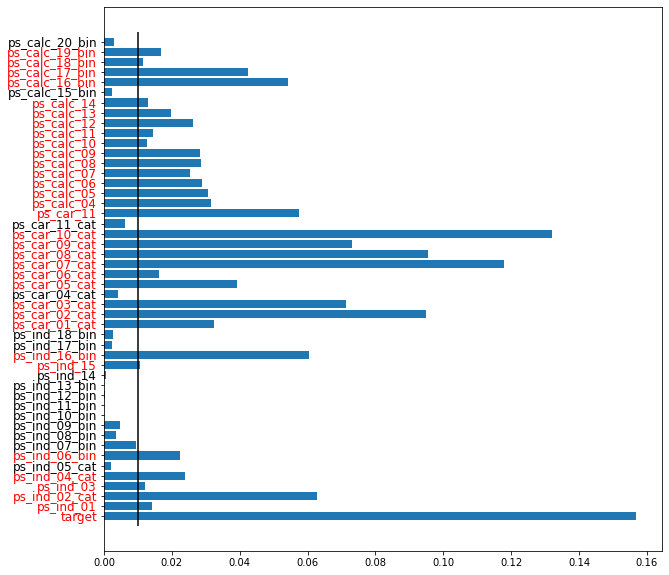

In [0]:
f, ax = plt.subplots(figsize = (10, 10))
pos = np.arange(len(mf_int))
plt.barh(pos, mf_int)
plt.yticks(pos, int_var)
threshold = 0.01

for i, tick in enumerate(ax.yaxis.get_major_ticks()) :
    tick.label.set_fontsize(12)
    if np.squeeze(mf_int)[i] > threshold :
        tick.label.set_color("red")
        
plt.vlines(x = threshold , ymin = -1 , ymax = len(mf_int))

In [0]:
bin_col = [col for col in train.columns if 'bin' in col]
zero_list = []
one_list = []
for col in bin_col:
  zero_list.append((train[col] == 0).sum())
  one_list.append((train[col] == 1).sum())

In [0]:
trace1 = go.Bar(
    x = bin_col,
    y = zero_list,
    name = 'Zero count'
)

trace2 = go.Bar(
    x = bin_col,
    y = one_list,
    name = 'One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode = 'stack',
    title = 'Count of 1 and 0 in binary variables'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## RandomForest 변수 중요도 시각화

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150,
                            max_depth = 8,
                            min_samples_leaf = 4,
                            max_features = 0.2,
                            n_jobs = -1,
                            random_state = 2020)
rf.fit(train.drop(['id', 'target'], axis = 1), train.target)
features = train.drop(['id', 'target'], axis = 1).columns.values

In [0]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 12,
        color = rf.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = features
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend  = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter')

In [0]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x = x ,
    y = y,
    marker = dict(
        color = x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name = 'Random Forest Feature importance',
    orientation = 'h',
)

layout = dict(
    title = 'Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis = dict(
        showgrid = False,
        showline = False,
        showticklabels = True,
    ))

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename = 'plots')

##  Gradient Boosting 변수 중요도 시각화

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100,
                                max_depth = 3,
                                min_samples_leaf = 4,
                                max_features = 0.2,
                                random_state = 0)
gb.fit(train.drop(['id', 'target'], axis = 1), train.target)
features = train.drop(['id', 'target'], axis = 1).columns.values
print('-'*10, 'Training Done', '-'*10)

---------- Training Done ----------


In [0]:
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        size = rf.feature_importances_,
        color = gb.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = features
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Gradient Boosting Machine Feature Importance',
    hovermode = 'closest',
     xaxis =  dict(
         ticklen =  5,
         showgrid = False,
        zeroline = False,
        showline = False
     ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen =  5,
        gridwidth =  2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig,filename = 'scatter2010')

In [0]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse  =  False)))
trace2 = go.Bar(
    x = x ,
    y = y,
    marker = dict(
        color = x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name = 'Gradient Boosting Classifer Feature importance',
    orientation = 'h',
)

layout = dict(
    title = 'Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis = dict(
        showgrid = False,
        showline = False,
        showticklabels = True,
    ))

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename = 'plots')

## Reference
- [Interactive Porto Insights - A Plot.ly Tutorial](https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial)  
- [pyecharts](http://pyecharts.org/#/zh-cn/intro)  
- [클러스터링을 평가하는 척도 - Mutual Information](https://yjucho1.github.io/clustering/mutual-information/)  
- [[sklearn ] mutual_info_classif , mutual_info_regression를 활용하여 변수 선택하기 (feature selection)](https://data-newbie.tistory.com/430)